In [1]:
# Data
import pandas as pd
import numpy as np

# Statistics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , label_binarize
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc , roc_auc_score
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt

# Warning
import warnings
warnings.filterwarnings('ignore')

# Data exploration

In [2]:
# Reading the data
path = '/kaggle/input/breast-cancer-dataset/breast-cancer.csv'

df = pd.read_csv(path)

df.head().transpose()

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Checking for missing values

df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


diagnosis
B    357
M    212
Name: count, dtype: int64


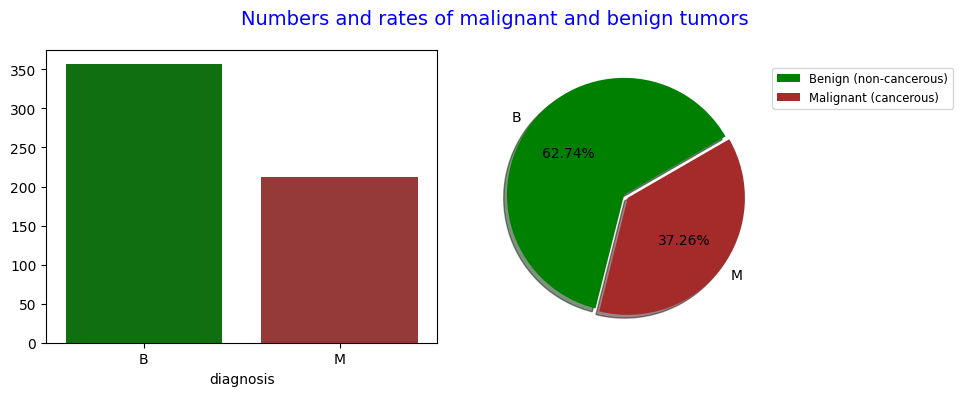

In [6]:
cols = ["green", "brown"]
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x=df["diagnosis"].value_counts().index, y=df["diagnosis"].value_counts(), palette=cols)
plt.ylabel("")
plt.subplot(1,2,2)
plt.pie(x=df["diagnosis"].value_counts(), labels=df["diagnosis"].value_counts().index, shadow=True,
        explode=[0.02, 0.02], startangle=30, autopct='%0.2f%%', colors=cols)
plt.legend(labels=["Benign (non-cancerous)", "Malignant (cancerous)"], loc=(1,0.8), fontsize="small")
plt.suptitle("Numbers and rates of malignant and benign tumors", fontsize=14, color="b")
plt.tight_layout()
print(df.diagnosis.value_counts())
plt.show()

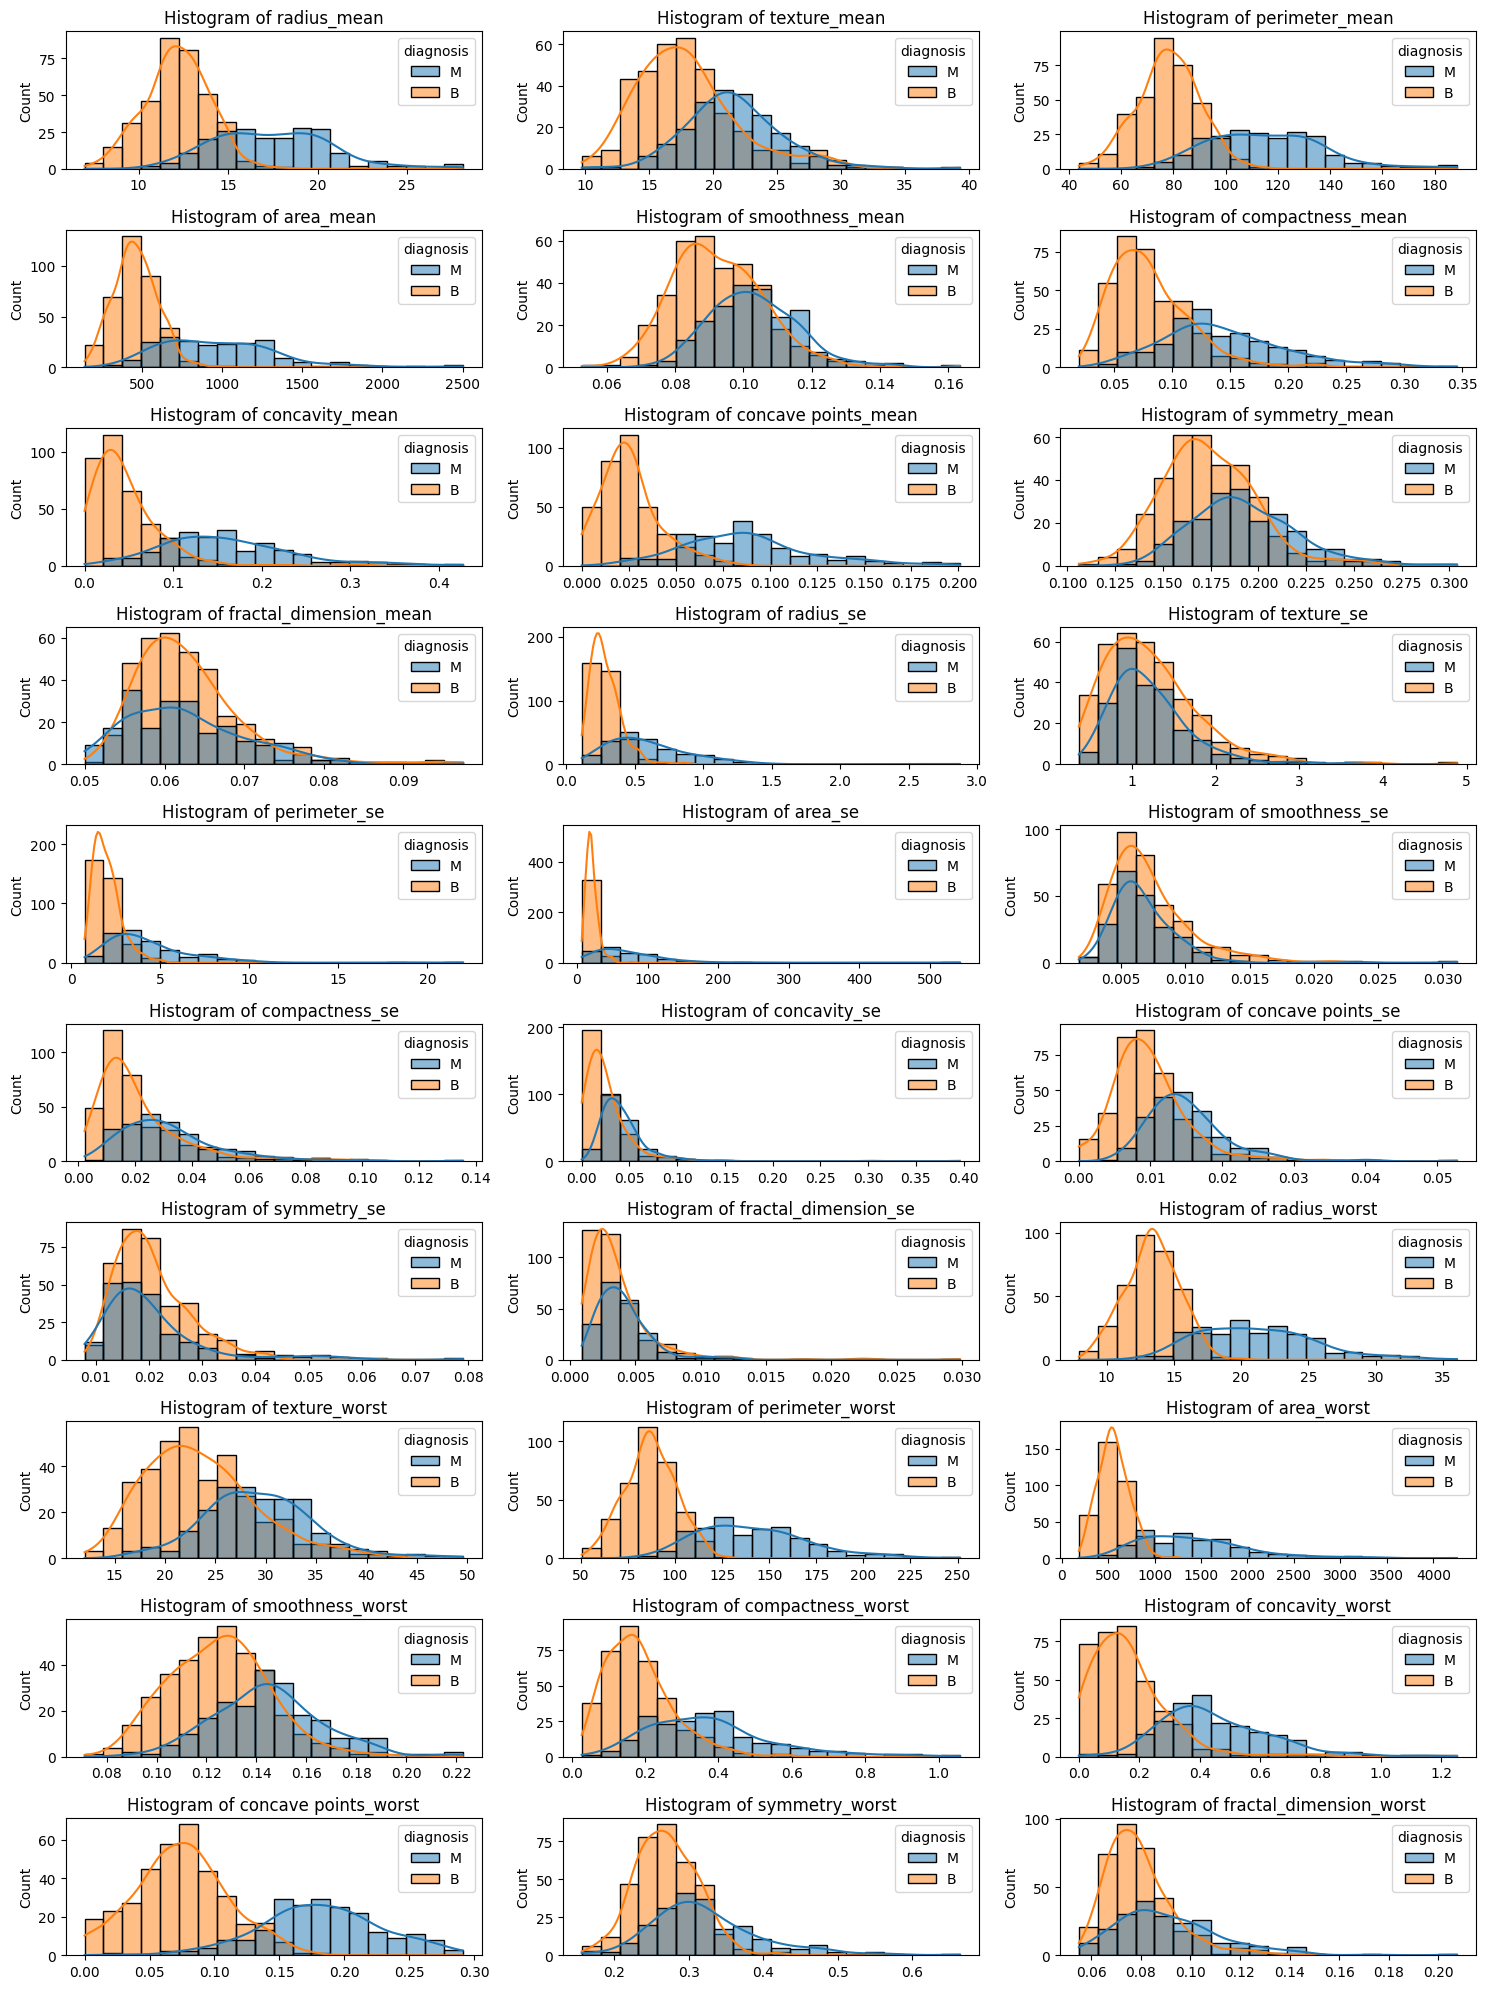

In [7]:
data = df.drop('id', axis =1)

fig, axes = plt.subplots(nrows=len(data.columns) // 3, ncols=3, figsize=(15, 20))
axes = axes.flatten()  


for i, col in enumerate(data.select_dtypes(include='number').columns):
    sns.histplot(data=data, x=col, hue='diagnosis', ax=axes[i], bins=20, kde=True)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('')


plt.tight_layout()
plt.show()

# Feature and Target Selection

In [8]:
# 'diagnosis' sütununu 'B' ve 'M' değerlerini 0 ve 1'e map etme
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

# 'id' sütununu silme
df.drop(columns=['id'], inplace=True)

# 'diagnosis' sütununu çıkararak X ve y'yi oluşturma
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']


In [9]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [10]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
# !!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 10)

In [12]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Support Vector Machine (SVM)

In [13]:
svm_model = SVC(kernel='rbf', random_state=15 , probability= True)
svm_model.fit(X_train_scaled, y_train)

svm_y_pred = svm_model.predict(X_test_scaled)

svm_class_rep = classification_report(y_test, svm_y_pred)
print(svm_class_rep)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        75
           1       0.91      1.00      0.95        39

    accuracy                           0.96       114
   macro avg       0.95      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



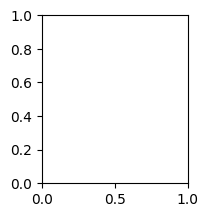

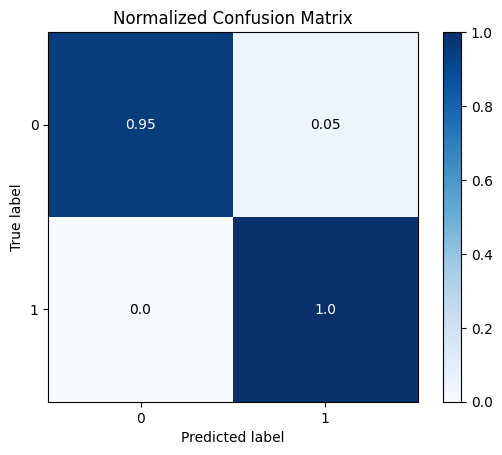

In [14]:
# Confusion Matrix
plt.subplot(2, 3, 6)
skplt.metrics.plot_confusion_matrix(y_test, svm_model.predict(X_test_scaled) , normalize=True,cmap='Blues')
plt.title('Normalized Confusion Matrix')


plt.show()

> True Positive (TP): Gerçekte pozitif olan örnekleri doğru bir şekilde pozitif olarak tahmin etme oranı. Bu durumda, 0.95, gerçekte pozitif olan örneklerin %95'inin doğru bir şekilde pozitif olarak tahmin edildiğini gösterir.
> 
> False Positive (FP): Gerçekte negatif olan örnekleri yanlış bir şekilde pozitif olarak tahmin etme oranı. Bu durumda, 0.05, gerçekte negatif olan örneklerin %5'inin yanlış bir şekilde pozitif olarak tahmin edildiğini gösterir.
> 
> False Negative (FN): Gerçekte pozitif olan örnekleri yanlış bir şekilde negatif olarak tahmin etme oranı. Bu durumda, 0.00, gerçekte pozitif olan örneklerin hiçbirinin yanlış bir şekilde negatif olarak tahmin edilmediğini gösterir.
> 
> True Negative (TN): Gerçekte negatif olan örnekleri doğru bir şekilde negatif olarak tahmin etme oranı. Bu durumda, 1.00, gerçekte negatif olan örneklerin %100'ünün doğru bir şekilde negatif olarak tahmin edildiğini gösterir.

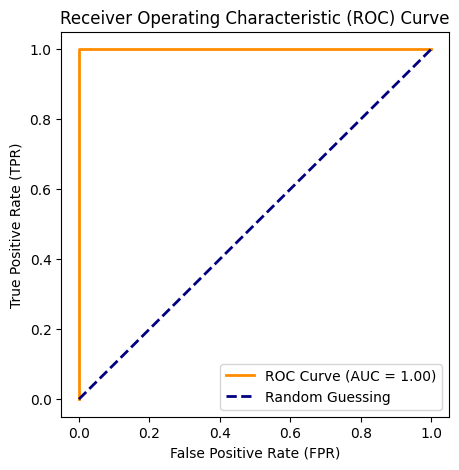

In [15]:
# Test seti üzerinde tahmin olasılıklarını al
svm_y_probs = svm_model.predict_proba(X_test_scaled)[:, 1]

# ROC eğrisi hesapla
fpr, tpr, thresholds = roc_curve(y_test, svm_y_probs)
roc_auc = auc(fpr, tpr)

# ROC eğrisini çiz
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

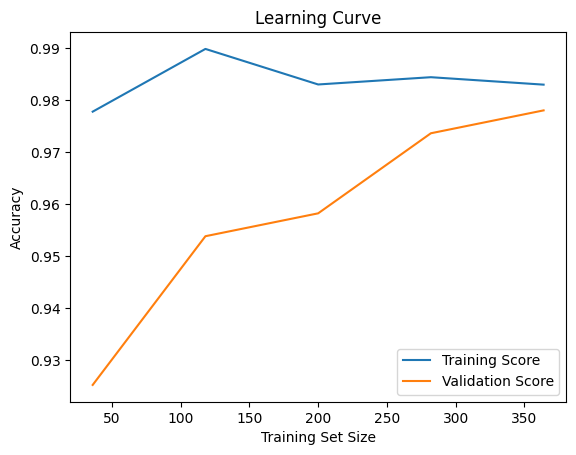

In [16]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(svm_model, X_train_scaled, y_train, cv=5)
avg_train_scores = np.mean(train_scores, axis=1)
avg_test_scores = np.mean(test_scores, axis=1)

plt.plot(train_sizes, avg_train_scores, label='Training Score')
plt.plot(train_sizes, avg_test_scores, label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

# Logistic Regression

In [17]:
lg_model = LogisticRegression()
lg_model.fit(X_train_scaled, y_train)

lg_y_pred = lg_model.predict(X_test_scaled)

lg_class_rep = classification_report(y_test, lg_y_pred)
print(lg_class_rep)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        75
           1       0.90      0.97      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



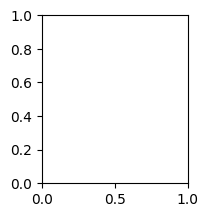

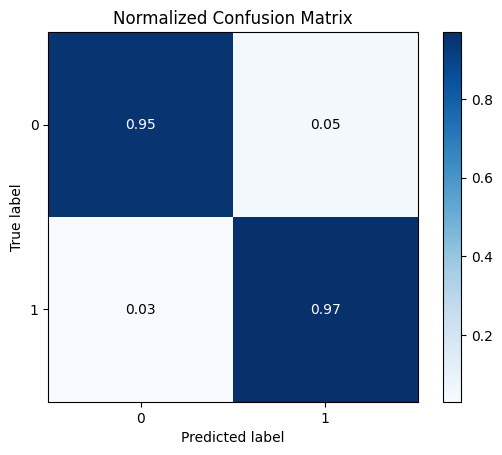

In [18]:
# Confusion Matrix
plt.subplot(2, 3, 6)
skplt.metrics.plot_confusion_matrix(y_test, lg_model.predict(X_test_scaled) , normalize=True,cmap='Blues')
plt.title('Normalized Confusion Matrix')


plt.show()

> True Positive (TP): Gerçekte pozitif olan örnekleri doğru bir şekilde pozitif olarak tahmin etme oranı. Bu durumda, 0.95, gerçekte pozitif olan örneklerin %95'inin doğru bir şekilde pozitif olarak tahmin edildiğini gösterir.
> 
> False Positive (FP): Gerçekte negatif olan örnekleri yanlış bir şekilde pozitif olarak tahmin etme oranı. Bu durumda, 0.05, gerçekte negatif olan örneklerin %5'inin yanlış bir şekilde pozitif olarak tahmin edildiğini gösterir.
> 
> False Negative (FN): Gerçekte pozitif olan örnekleri yanlış bir şekilde negatif olarak tahmin etme oranı. Bu durumda, 0.03, gerçekte pozitif olan örneklerin %3 yanlış bir şekilde negatif olarak tahmin edilmediğini gösterir.
> 
> True Negative (TN): Gerçekte negatif olan örnekleri doğru bir şekilde negatif olarak tahmin etme oranı. Bu durumda, 0.97 , gerçekte negatif olan örneklerin %97'ünün doğru bir şekilde negatif olarak tahmin edildiğini gösterir.

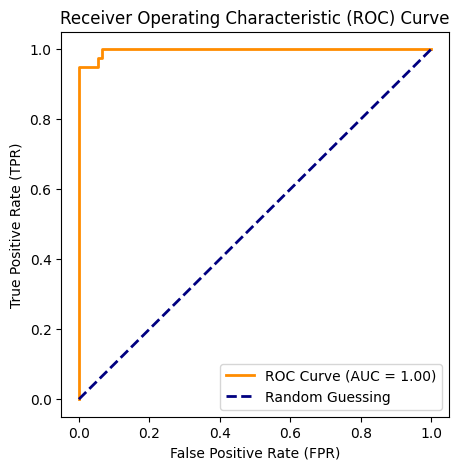

In [19]:
# Test seti üzerinde tahmin olasılıklarını al
lg_y_probs = lg_model.predict_proba(X_test_scaled)[:, 1]

# ROC eğrisi hesapla
fpr, tpr, thresholds = roc_curve(y_test, lg_y_probs)
roc_auc = auc(fpr, tpr)

# ROC eğrisini çiz
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

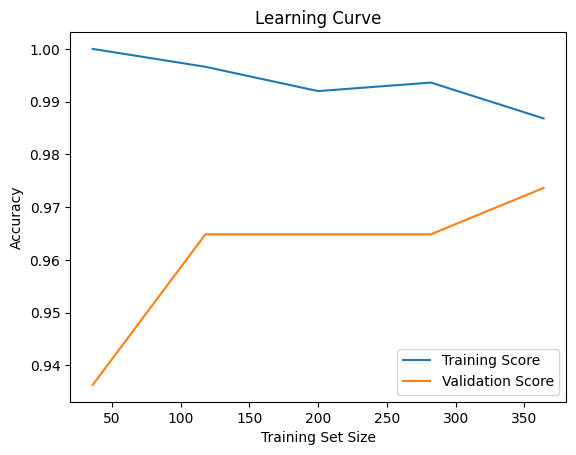

In [20]:

train_sizes, train_scores, test_scores = learning_curve(lg_model, X_train_scaled, y_train, cv=5)
avg_train_scores = np.mean(train_scores, axis=1)
avg_test_scores = np.mean(test_scores, axis=1)

plt.plot(train_sizes, avg_train_scores, label='Training Score')
plt.plot(train_sizes, avg_test_scores, label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

# Decision Tree Classifier

In [21]:
dc_model = DecisionTreeClassifier()
dc_model.fit(X_train_scaled, y_train)

dc_y_pred = dc_model.predict(X_test_scaled)

dc_class_rep = classification_report(y_test, svm_y_pred)
print(dc_class_rep)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        75
           1       0.91      1.00      0.95        39

    accuracy                           0.96       114
   macro avg       0.95      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



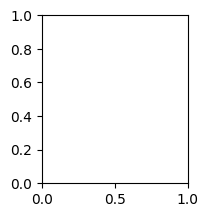

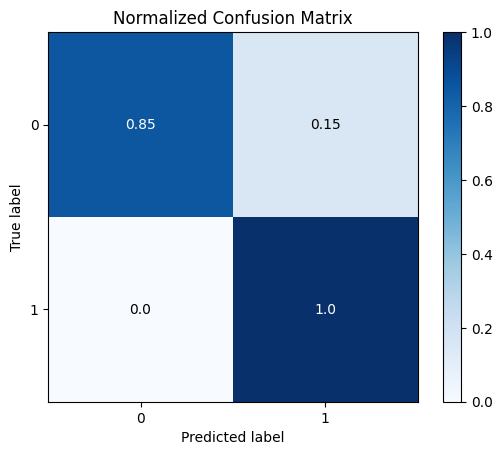

In [22]:
# Confusion Matrix
plt.subplot(2, 3, 6)
skplt.metrics.plot_confusion_matrix(y_test, dc_model.predict(X_test_scaled) , normalize=True,cmap='Blues')
plt.title('Normalized Confusion Matrix')


plt.show()

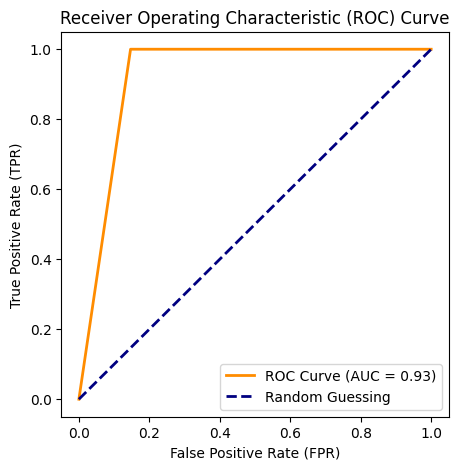

In [23]:
# Test seti üzerinde tahmin olasılıklarını al
dc_y_probs = dc_model.predict_proba(X_test_scaled)[:, 1]

# ROC eğrisi hesapla
fpr, tpr, thresholds = roc_curve(y_test, dc_y_probs)
roc_auc = auc(fpr, tpr)

# ROC eğrisini çiz
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

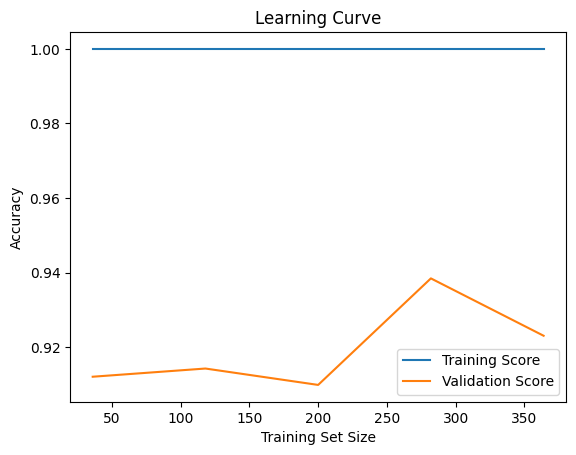

In [24]:
train_sizes, train_scores, test_scores = learning_curve(dc_model, X_train_scaled, y_train, cv=5)
avg_train_scores = np.mean(train_scores, axis=1)
avg_test_scores = np.mean(test_scores, axis=1)

plt.plot(train_sizes, avg_train_scores, label='Training Score')
plt.plot(train_sizes, avg_test_scores, label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

# KNN (K-Nearest Neighbors)

In [25]:

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)

knn_y_pred = knn_model.predict(X_test_scaled)

knn_class_rep = classification_report(y_test, svm_y_pred)
print(dc_class_rep)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        75
           1       0.91      1.00      0.95        39

    accuracy                           0.96       114
   macro avg       0.95      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



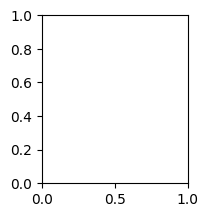

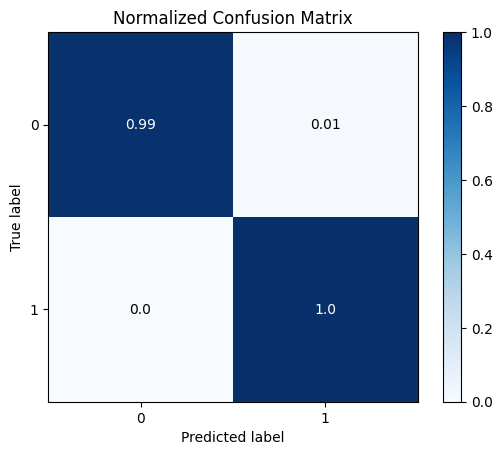

In [26]:
# Confusion Matrix
plt.subplot(2, 3, 6)
skplt.metrics.plot_confusion_matrix(y_test, knn_model.predict(X_test_scaled) , normalize=True,cmap='Blues')
plt.title('Normalized Confusion Matrix')


plt.show()

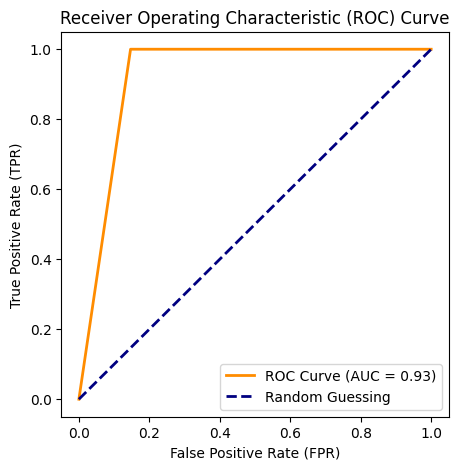

In [27]:
# Test seti üzerinde tahmin olasılıklarını al
knn_y_probs = knn_model.predict_proba(X_test_scaled)[:, 1]

# ROC eğrisi hesapla
fpr, tpr, thresholds = roc_curve(y_test, dc_y_probs)
roc_auc = auc(fpr, tpr)

# ROC eğrisini çiz
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

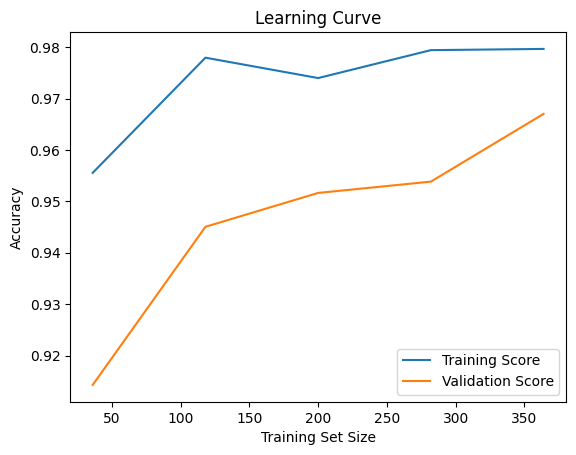

In [28]:
train_sizes, train_scores, test_scores = learning_curve(knn_model, X_train_scaled, y_train, cv=5)
avg_train_scores = np.mean(train_scores, axis=1)
avg_test_scores = np.mean(test_scores, axis=1)

plt.plot(train_sizes, avg_train_scores, label='Training Score')
plt.plot(train_sizes, avg_test_scores, label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()